# Working with SEG-Y headers

Headers in SEG-Y data are additional meta information asscoiated with each trace. In SEG-Y these are not pooled in a common data block but interleaved with the seismic trace data so we need to do some work to extract it. **segysak** has two helper methods for extracting information from a SEGY file. These are `segy_header_scan` and `segy_header_scrape`. Both of these functions return `pandas.DataFrame` objects containing header or header related information which can be used QC, analysis and plotting.

## Scanning the headers

`segy_header_scan` is primarily designed to help quickly asscertain the byte locations of key header information for loading or converting the full SEG-Y file. It does this by just looking at the first *N* traces (1000 by default) and returns the byte location and statistics related to the file.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from segysak.segy import segy_header_scan
# default just needs the file name
scan = segy_header_scan('/media/enseadamartel/Expansion/dados_monitor1/estacao258_total.sgy')
scan

Processing Chunks:   0%|          | 0.00/1.00 [00:00<?, ? trace-chunks/s]

Reading header:   0%|          | 0.00/1.00k [00:00<?, ? traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,500.5,288.819436,1.0,2.507500e+02,500.5,7.502500e+02,1000.0
TRACE_SEQUENCE_FILE,5,1000.0,1.0,0.000000,1.0,1.000000e+00,1.0,1.000000e+00,1.0
FieldRecord,9,1000.0,132.5,72.204317,8.0,7.000000e+01,132.5,1.950000e+02,257.0
TraceNumber,13,1000.0,258.0,0.000000,258.0,2.580000e+02,258.0,2.580000e+02,258.0
EnergySourcePoint,17,1000.0,1316.5,72.204317,1192.0,1.254000e+03,1316.5,1.379000e+03,1441.0
...,...,...,...,...,...,...,...,...,...
SourceMeasurementMantissa,225,1000.0,52625666.0,0.000000,52625666.0,5.262567e+07,52625666.0,5.262567e+07,52625666.0
SourceMeasurementExponent,229,1000.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0
SourceMeasurementUnit,231,1000.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0
UnassignedInt1,233,1000.0,150995056.0,0.000000,150995056.0,1.509951e+08,150995056.0,1.509951e+08,150995056.0


If you want to see the full DataFrame in a notebook, use the `pandas` options context manager.


In [4]:
import pandas as pd
with pd.option_context('display.max_rows', 89):
    display(scan)

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,500.5,288.819436,1.0,2.507500e+02,500.5,7.502500e+02,1000.0
TRACE_SEQUENCE_FILE,5,1000.0,1.0,0.000000,1.0,1.000000e+00,1.0,1.000000e+00,1.0
FieldRecord,9,1000.0,132.5,72.204317,8.0,7.000000e+01,132.5,1.950000e+02,257.0
TraceNumber,13,1000.0,258.0,0.000000,258.0,2.580000e+02,258.0,2.580000e+02,258.0
EnergySourcePoint,17,1000.0,1316.5,72.204317,1192.0,1.254000e+03,1316.5,1.379000e+03,1441.0
...,...,...,...,...,...,...,...,...,...
SourceMeasurementMantissa,225,1000.0,52625666.0,0.000000,52625666.0,5.262567e+07,52625666.0,5.262567e+07,52625666.0
SourceMeasurementExponent,229,1000.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0
SourceMeasurementUnit,231,1000.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0
UnassignedInt1,233,1000.0,150995056.0,0.000000,150995056.0,1.509951e+08,150995056.0,1.509951e+08,150995056.0


Often lots of header fields don't get filled, so lets filter by the standard deviation column `std`. Infact, there are so few here we don't need the context manager. As you can see, for `segy_loader` or `segy_converter` we will need to tell those functions that the byte location for **iline** and **xline** are *189* and *193* respectively, and the byte locations for **cdp_x** and **cdp_y** are either *73* and *77* or *181* and *185* which are identical pairs.

In [6]:
# NIIIICCCEEEE...
scan[scan['std'] > 0]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,5.005000e+02,288.819436,1.0,250.75,500.5,750.25,1000.0
FieldRecord,9,1000.0,1.325000e+02,72.204317,8.0,70.00,132.5,195.00,257.0
EnergySourcePoint,17,1000.0,1.316500e+03,72.204317,1192.0,1254.00,1316.5,1379.00,1441.0
CDP,21,1000.0,3.592335e+05,302.955930,359018.0,359085.00,359152.5,359226.00,360270.0
offset,37,1000.0,3.331720e+03,5286.898921,-5969.0,5768.00,5984.0,6574.00,7439.0
SourceSurfaceElevation,45,1000.0,1.868000e+00,0.338660,1.0,2.00,2.0,2.00,2.0
SourceWaterDepth,61,1000.0,1.362156e+04,285.227139,13100.0,13390.00,13635.0,13850.00,14120.0
SourceX,73,1000.0,3.956906e+06,13977.929761,3932809.0,3944827.00,3956927.5,3969039.00,3981032.0
SourceY,77,1000.0,7.650623e+07,11423.240419,76486552.0,76496392.00,76506256.0,76516144.00,76525936.0
MinuteOfHour,163,1000.0,2.605200e+01,12.239898,5.0,16.00,26.0,37.00,47.0


## Scraping Headers

Scraping the header works like a scan but instead of statistics we get a DataFrame of actual trace header values. You can reduce the size of the scan by using the *partial_scan* keyword if required. The index of the DataFrame is the trace index and the columns are the header fields.

In [8]:
from segysak.segy import segy_header_scrape
scrape = segy_header_scrape('/media/enseadamartel/Expansion/dados_monitor1/estacao258_total.sgy', partial_scan=10000)
scrape

Processing Chunks:   0%|          | 0.00/1.00 [00:00<?, ? trace-chunks/s]

Reading header:   0%|          | 0.00/10.0k [00:00<?, ? traces/s]

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2
0,1,1,8,258,1441,359267,0,1,1,1,...,4509,308,375,268763288,18640,52625666,0,0,150995056,362610688
1,2,1,8,258,1441,359267,0,1,1,1,...,4509,308,375,268763288,18640,52625666,0,0,150995056,362610688
2,3,1,8,258,1441,359267,0,1,1,1,...,4509,308,375,268763288,18640,52625666,0,0,150995056,362610688
3,4,1,8,258,1441,359267,0,1,1,1,...,4509,308,375,268763288,18640,52625666,0,0,150995056,362610688
4,5,1,9,258,1440,359266,0,1,1,1,...,4506,308,375,268763288,18640,52625666,0,0,150995056,362610688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,301,258,1294,364535,0,1,1,1,...,4005,308,375,268763289,3103,52625666,0,0,150995055,362610688
9996,9997,1,302,258,1295,364536,0,1,1,1,...,4009,308,375,268763289,3103,52625666,0,0,150995055,362610688
9997,9998,1,302,258,1295,364536,0,1,1,1,...,4009,308,375,268763289,3103,52625666,0,0,150995055,362610688
9998,9999,1,302,258,1295,364536,0,1,1,1,...,4009,308,375,268763289,3103,52625666,0,0,150995055,362610688


We know from the scan that many of these fields were empty so lets go ahead and filter our *scrape* by using the standard deviation again and passing the index which is the same as our column names.

In [15]:
scrape = scrape[scan[scan['std'] > 0].index]
scrape

,TRACE_SEQUENCE_LINE,FieldRecord,EnergySourcePoint,CDP,offset,SourceSurfaceElevation,SourceWaterDepth,SourceX,SourceY,MinuteOfHour,SecondOfMinute,CDP_X,CDP_Y,INLINE_3D,CROSSLINE_3D,ShotPointScalar,TransductionConstantMantissa,TraceIdentifier
0,1,8,1441,359267,7439,1,14120,3981032,76486552,5,23,3944623,76479056,2227,2695,256,65535,4509
1,2,8,1441,359267,7439,1,14120,3981032,76486552,5,23,3944623,76479056,2227,2695,1536,65535,4509
2,3,8,1441,359267,7439,1,14120,3981032,76486552,5,23,3944623,76479056,2227,2695,1792,65535,4509
3,4,8,1441,359267,7439,1,14120,3981032,76486552,5,23,3944623,76479056,2227,2695,2048,65535,4509
4,5,9,1440,359266,7424,1,14120,3980840,76486720,5,34,3944526,76479136,2227,2694,256,65535,4506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,301,1294,364535,5738,0,13570,3951778,76508856,20,17,3930007,76490208,2232,2548,2048,0,4005
9996,9997,302,1295,364536,5741,0,13580,3951968,76508688,20,27,3930104,76490128,2232,2549,256,0,4009
9997,9998,302,1295,364536,5741,0,13580,3951968,76508688,20,27,3930104,76490128,2232,2549,1536,0,4009
9998,9999,302,1295,364536,5741,0,13580,3951968,76508688,20,27,3930104,76490128,2232,2549,1792,0,4009


And our example wouldn't be complete without some plots:

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

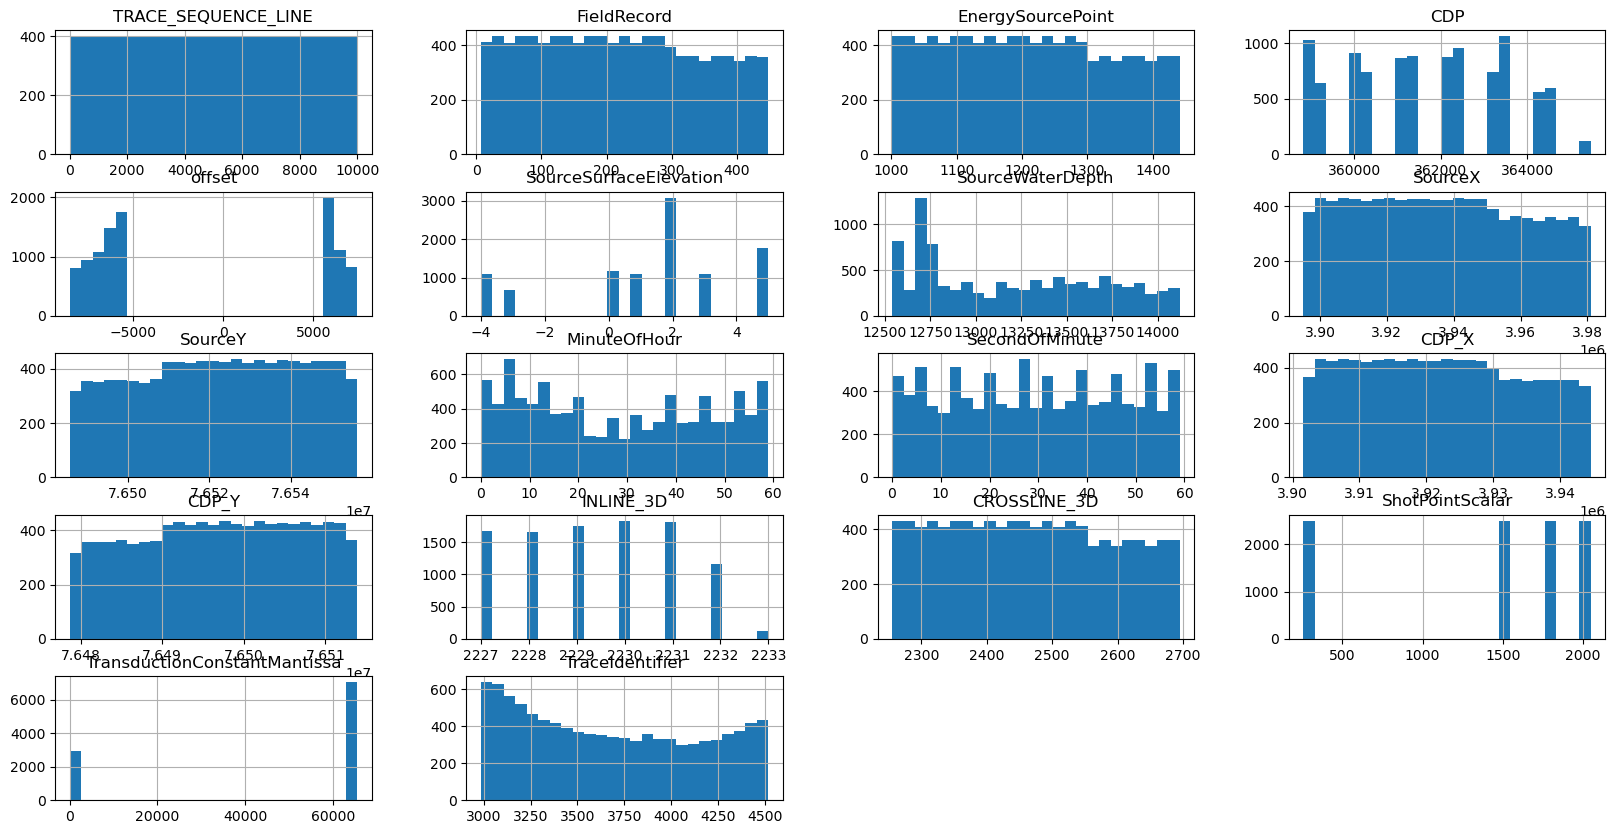

In [26]:
plot = scrape.hist(bins=25, figsize=(20, 10))
plt.show()

We can also just plot up the geometry to check that everything looks ok, here the line numbering and coordinates seem to match up, great!

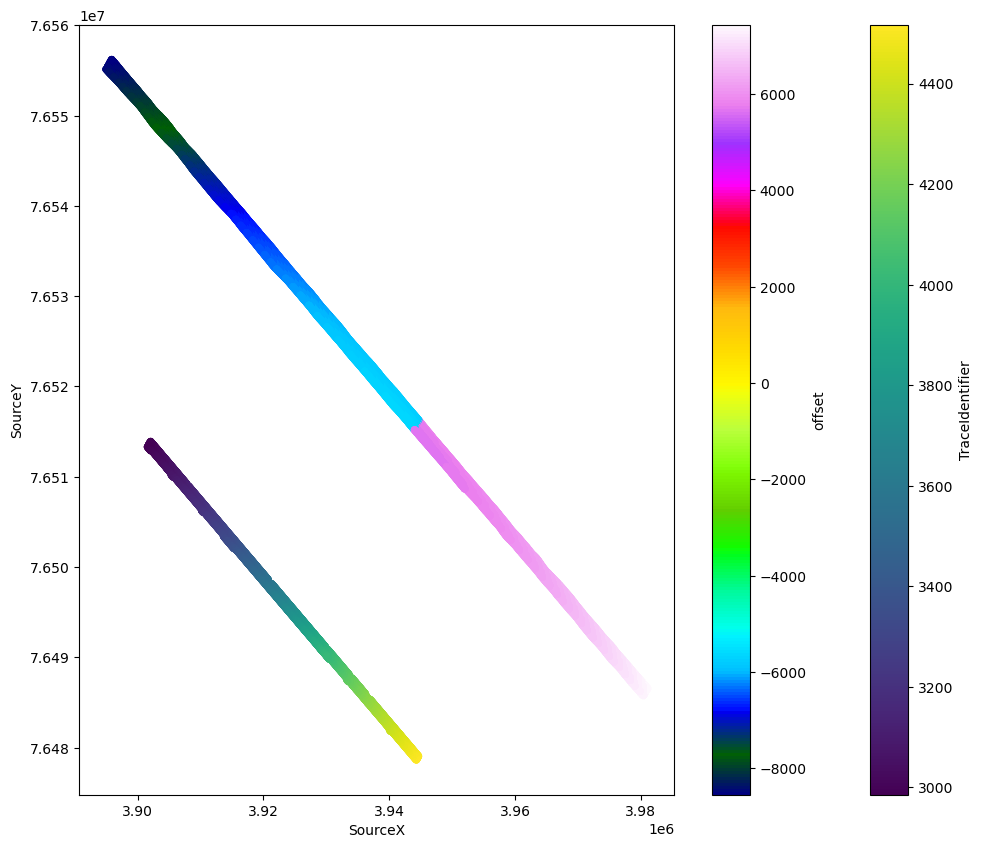

In [36]:
fig, axs = plt.subplots(nrows=1, figsize=(12, 10), sharex=True, sharey=True)

scrape.plot(kind='scatter', x='CDP_X', y='CDP_Y', c='TraceIdentifier', ax=axs, cmap='viridis')
scrape.plot(kind='scatter', x='SourceX', y='SourceY', c='offset', ax=axs, cmap='gist_ncar')
plt.show()